In [1]:
import numpy as np
# import matplot for visualization
import matplotlib.pyplot as plt
#to see the plots inside of the notebook
%matplotlib inline
# import tensorflow and required layers
# note that tensorflow.contrib.layers was previously migrated from TF Slim.
import tensorflow as tf
from scipy import misc
from scipy.stats import entropy
import tarfile
from six.moves import urllib
import os.path

In [2]:
model_dir='./model/'
DATA_URL = 'http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz'


In [3]:
def maybe_download_and_extract():
  """Download and extract model tar file."""
  dest_directory = model_dir
  if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)
  filename = DATA_URL.split('/')[-1]
  filepath = os.path.join(dest_directory, filename)
  if not os.path.exists(filepath):
    def _progress(count, block_size, total_size):
      sys.stdout.write('\r>> Downloading %s %.1f%%' % (
          filename, float(count * block_size) / float(total_size) * 100.0))
      sys.stdout.flush()
    filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, _progress)
    print()
    statinfo = os.stat(filepath)
    print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
  tarfile.open(filepath, 'r:gz').extractall(dest_directory)


In [4]:
maybe_download_and_extract()

In [5]:
def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(model_dir
      , 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

create_graph()

In [6]:
def run_inference_on_image(image):
  """Runs inference on an image.

  Args:
    image: Image file name.

  Returns:
    Nothing
  """


  with tf.Session() as sess:
    # Some useful tensors:
    # 'softmax:0': A tensor containing the normalized prediction across
    #   1000 labels.
    # 'pool_3:0': A tensor containing the next-to-last layer containing 2048
    #   float description of the image.
    # 'DecodeJpeg/contents:0': A tensor containing a string providing JPEG
    #   encoding of the image.
    # Runs the softmax tensor by feeding the image_data as input to the graph.
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    predictions = sess.run(softmax_tensor,
                           {'DecodeJpeg:0': image})
    predictions = np.squeeze(predictions)
    # Creates node ID --> English string lookup.
    return predictions


In [7]:
imgsNames = ['sax','bird']
imgsDir='./images/'
imgsType='.jpg'
imgs = [misc.imread(imgsDir+imgName+imgsType) for imgName in imgsNames ]
#img = misc.imread('images/sax.jpg')#,size=[600,600]#.reshape([1,600,600,3])
boxStartX=0
boxStartY=0
boxWidth=100
boxHeight=100
xStep=int(boxWidth/2)
yStep=int(boxHeight/2)


In [8]:
def DoTheThing(img):
    #log=dict()
    OriginalPredictions = run_inference_on_image(img)
    copy = img.copy()
    for x in np.arange(0, img.shape[1], xStep):
        for y in np.arange(0, img.shape[0], xStep):
            s=img[x:x+boxWidth,y:y+boxHeight,:]
            cop=img.copy()
            cop[x:x+boxWidth,y:y+boxHeight,:]=np.zeros_like(s)
            predictions = run_inference_on_image(cop)
            #print(predictions)
            ent=entropy(OriginalPredictions,predictions)
            print(ent)
            copy[x:x+boxWidth,y:y+boxHeight,:]=copy[x:x+boxWidth,y:y+boxHeight,:]*ent*255
            #log[(x,y)]=predictions
    plt.imshow(copy)
    plt.show()


0.000267843
0.00130041
0.00135311
0.00340075
0.00156309
0.000298329
0.000163809
0.000689582
0.000369061
0.0
0.00338646
0.00662607
0.00222196
0.0166912
0.0166338
0.00072574
0.000900001
0.000876369
0.00186036
0.0
0.00124033
0.00384495
0.000956137
0.0379305
0.0171528
0.00149461
0.000608232
0.000911593
0.000284242
0.0
0.000406776
0.0110017
0.00614662
0.0103886
0.0113838
0.00447438
0.000242154
0.000340319
0.000184002
0.0
0.000253833
0.00143364
0.000867899
0.00333357
0.00493906
0.00637142
0.000975026
0.000104081
9.3536e-05
0.0
0.000215126
0.00151891
0.00222162
0.0014419
0.00312256
0.00461278
0.00118786
7.00462e-05
8.55117e-05
0.0
0.000121251
0.000385718
0.00215532
0.000415354
0.0128931
0.00239815
0.00244959
0.000241536
0.000150391
0.0
0.000171573
0.000419686
0.000267778
0.00320179
0.00286622
0.00218081
0.0037974
0.000127229
9.38844e-05
0.0
0.000153266
0.000774665
0.000458454
0.00102075
0.000327338
0.00108148
0.000198292
0.000356846
0.000127346
0.0


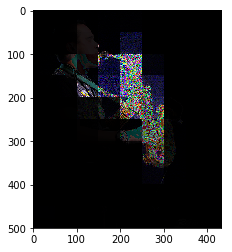

0.000288786
0.000257859
0.000336622
0.000683689
0.000644624
0.000555215
0.000813699
0.000489564
0.000322616
0.000622242
0.000177789
0.000600984
0.00151777
0.000902275
0.000642738
0.000673154
0.00179531
0.00456051
0.000787542
0.0029117
0.000235466
0.0031884
0.00220372
0.000925309
0.00143583
0.00161566
0.00241128
0.00249565
0.00187192
0.00203833
0.00056732
0.00120166
0.00428531
0.00915974
0.0292748
0.0313382
0.0019422
0.00227021
0.000914056
0.00101628
0.000413342
0.000609187
0.00091534
0.114165
0.803681
0.0220106
0.000671265
0.000631874
0.000367662
0.00146114
0.000308542
0.000308659
0.00117919
0.101395
0.027617
0.0670331
0.000665912
0.000887656
0.00138593
0.00302682
0.00035757
0.00133154
0.00627499
0.00536287
0.00703565
0.00261533
0.00171404
0.00100986
0.000354227
0.0021193
0.000580896
0.000537479
0.00165713
0.00151416
0.0108329
0.011682
0.000701609
0.000745628
0.000292287
0.000217994
0.00035903
0.000376589
0.000736301
0.000770282
0.00107487
0.000357448
0.000479024
0.000340811
0.00058260

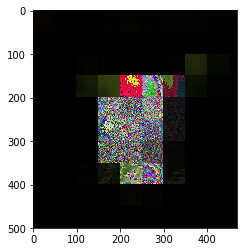

In [9]:
for img in imgs:
    DoTheThing(img)

In [ ]:
# node_lookup = NodeLookup()

# top_k = predictions.argsort()[-5:][::-1]
# for node_id in top_k:
#   human_string = node_lookup.id_to_string(node_id)
#   score = predictions[node_id]
#   print('%s (score = %.5f)' % (human_string, score))

# TODO: Capture the entropies of each image along with the coreesponding occlusion box start x,y, normalize the entropies to be from 0 to 01, then apply the modification to the pixels intensities based on the entropies